## GENDER INCOME GAP

You may know that it is estimated that women earn about 78% of what men earn in the same job position. 
Can we test that on NYC income data? Can we turn that into a prediction: if you get hired at a certain stipend as a men, what should you expect to make as a woman? (or from the point of view of a job employer, perhaps not one with a very strong moral compass, what should I offer to a woman job candidate, given what I would offer a man for the same job?)

In [1]:
import sys
import os
import numpy as np
import pylab as pl
import pandas as pd
import json
import os
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

%pylab inline

Populating the interactive namespace from numpy and matplotlib


the Census data on income
http://www.census.gov/hhes/www/cpstables/032015/perinc/pinc03_000.htm

I posted the relevant data on the class webpage here : http://cosmo.nyu.edu/~fb55/PUI2016/data

# 1. Create two python dictionaries to store your data. 
```
     allmales = ... 
```
stores the male data
```
    allfemales = ...
```
stores the female data
     
each dictionary needs to have 5 key-pair values with keys:
'all', 'white', 'black', 'hispanic', 'asian'
each value should contain a dataframe read with the pandas read_excel function directly from the url. 

In [2]:
#All data is from the following url: 
url = "http://cosmo.nyu.edu/~fb55/PUI2016/data/"

In [3]:
# 2 Python dictionaries to store data. 
allmales = {}
allfemales = {}

# Add keys and values to dictionaries
allmales['all'] = pd.read_excel(url + 'pinc08_2_1_1.xls', skiprows=9)
allmales['white'] = pd.read_excel(url + 'pinc08_2_1_4.xls', skiprows=9)
allmales['black'] = pd.read_excel(url + 'pinc08_2_1_6.xls', skiprows=9)
allmales['asian'] = pd.read_excel(url + 'pinc08_2_1_8.xls', skiprows=9)
allmales['hispanic'] = pd.read_excel(url + 'pinc08_2_1_9.xls', skiprows=9)

allfemales['all'] = pd.read_excel(url + 'pinc08_3_1_1.xls', skiprows=9)
allfemales['white'] = pd.read_excel(url + 'pinc08_3_1_4.xls', skiprows=9)
allfemales['black'] = pd.read_excel(url + 'pinc08_3_1_6.xls', skiprows=9)
allfemales['asian'] = pd.read_excel(url + 'pinc08_3_1_8.xls', skiprows=9)
allfemales['hispanic'] = pd.read_excel(url + 'pinc08_3_1_9.xls', skiprows=9)

In [4]:
type(allfemales)

dict

In [5]:
allfemales['all'].head()

,Characteristic,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,Unnamed: 44,Mean income,Unnamed: 46,Gini ratio,Unnamed: 48
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Value\n(Dol.),Standard\nerror (Dol.),Value\n(Dol.),Standard\nerror (Dol.),Ratio,Standard\nerror
1,....Total,109956.0,7590.0,4298.0,5557.0,7874.0,8052.0,5720.0,6768.0,4377.0,...,167.0,285.0,184.0,4442.0,22063,137,31968,250,0.495,0.0025
2,Earnings,74545.0,4198.0,3118.0,3269.0,2662.0,4579.0,1994.0,4134.0,2585.0,...,60.0,236.0,127.0,3535.0,27736,364,36189,307,0.466,0.0032
3,..Wages and Salary,71220.0,3835.0,2954.0,3005.0,2411.0,4309.0,1941.0,3908.0,2484.0,...,61.0,233.0,126.0,3370.0,28402,379,36412,316,0.461,0.0032
4,..Nonfarm Self-Employment,4694.0,1282.0,288.0,410.0,253.0,388.0,84.0,265.0,126.0,...,0.0,0.0,0.0,127.0,10732,399,20942,1123,0.65,0.0162


In [6]:
# Preview of the files
allfemales['all'].columns

Index(['Characteristic', 'Total with Income', '$1 to $2,499 or loss',
       '$2,500 to $4,999', '$5,000 to $7,499', '$7,500 to $9,999',
       '$10,000 to $12,499', '$12,500 to $14,999', '$15,000 to $17,499',
       '$17,500 to $19,999', '$20,000 to $22,499', '$22,500 to $24,999',
       '$25,000 to $27,499', '$27,500 to $29,999', '$30,000 to $32,499',
       '$32,500 to $34,999', '$35,000 to $37,499', '$37,500 to $39,999',
       '$40,000 to $42,499', '$42,500 to $44,999', '$45,000 to $47,499',
       '$47,500 to $49,999', '$50,000 to $52,499', '$52,500 to $54,999',
       '$55,000 to $57,499', '$57,500 to $59,999', '$60,000 to $62,499',
       '$62,500 to $64,999', '$65,000 to $67,499', '$67,500 to $69,999',
       '$70,000 to $72,499', '$72,500 to $74,999', '$75,000 to $77,499',
       '$77,500 to $79,999', '$80,000 to $82,499', '$82,500 to $84,999',
       '$85,000 to $87,499', '$87,500 to $89,999', '$90,000 to $92,499',
       '$92,500 to $94,999', '$95,000 to $97,499', '$97,500 

# Descriptive phase: 

In [7]:
# Run this cell to get an idea of the data
for k,v in allfemales.items():
    print("#####", k)
    print(v.describe())
for k,v in allmales.items():
    print("#####", k)
    print(v.describe())

##### all
       Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
count          46.000000             46.000000         46.000000   
mean        17383.000000           2971.826087       1010.608696   
std         28945.070201           7604.959824       1190.210877   
min            84.000000              0.000000          6.000000   
25%                  NaN                   NaN               NaN   
50%                  NaN                   NaN               NaN   
75%                  NaN                   NaN               NaN   
max        109956.000000          38367.000000       4298.000000   

       $5,000 to $7,499  $7,500 to $9,999  $10,000 to $12,499  \
count         46.000000         46.000000           46.000000   
mean        1148.869565       1470.391304         1469.478261   
std         1569.333455       2365.722680         2502.601125   
min            0.000000          2.000000            0.000000   
25%                 NaN               NaN           

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


       Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
count          46.000000             46.000000         46.000000   
mean        12310.782609           2214.586957        673.413043   
std         19885.397175           5970.622977        776.907047   
min            76.000000              0.000000          4.000000   
25%                  NaN                   NaN               NaN   
50%                  NaN                   NaN               NaN   
75%                  NaN                   NaN               NaN   
max         74382.000000          30286.000000       2583.000000   

       $5,000 to $7,499  $7,500 to $9,999  $10,000 to $12,499  \
count         46.000000         46.000000           46.000000   
mean         781.195652        971.630435         1036.956522   
std         1023.663283       1566.965750         1730.981173   
min            0.000000          0.000000            0.000000   
25%                 NaN               NaN                 NaN 

# 2. Exploratory phase
At this point it is a good idea to see if we can plot some data.

Pandas has a nifty function scatter_matrix which plots every numerical column against the other, however there are a lot of non-real values in these DataFrames so running pd.scatter_matrix(allmales['asian']) for example would fail.

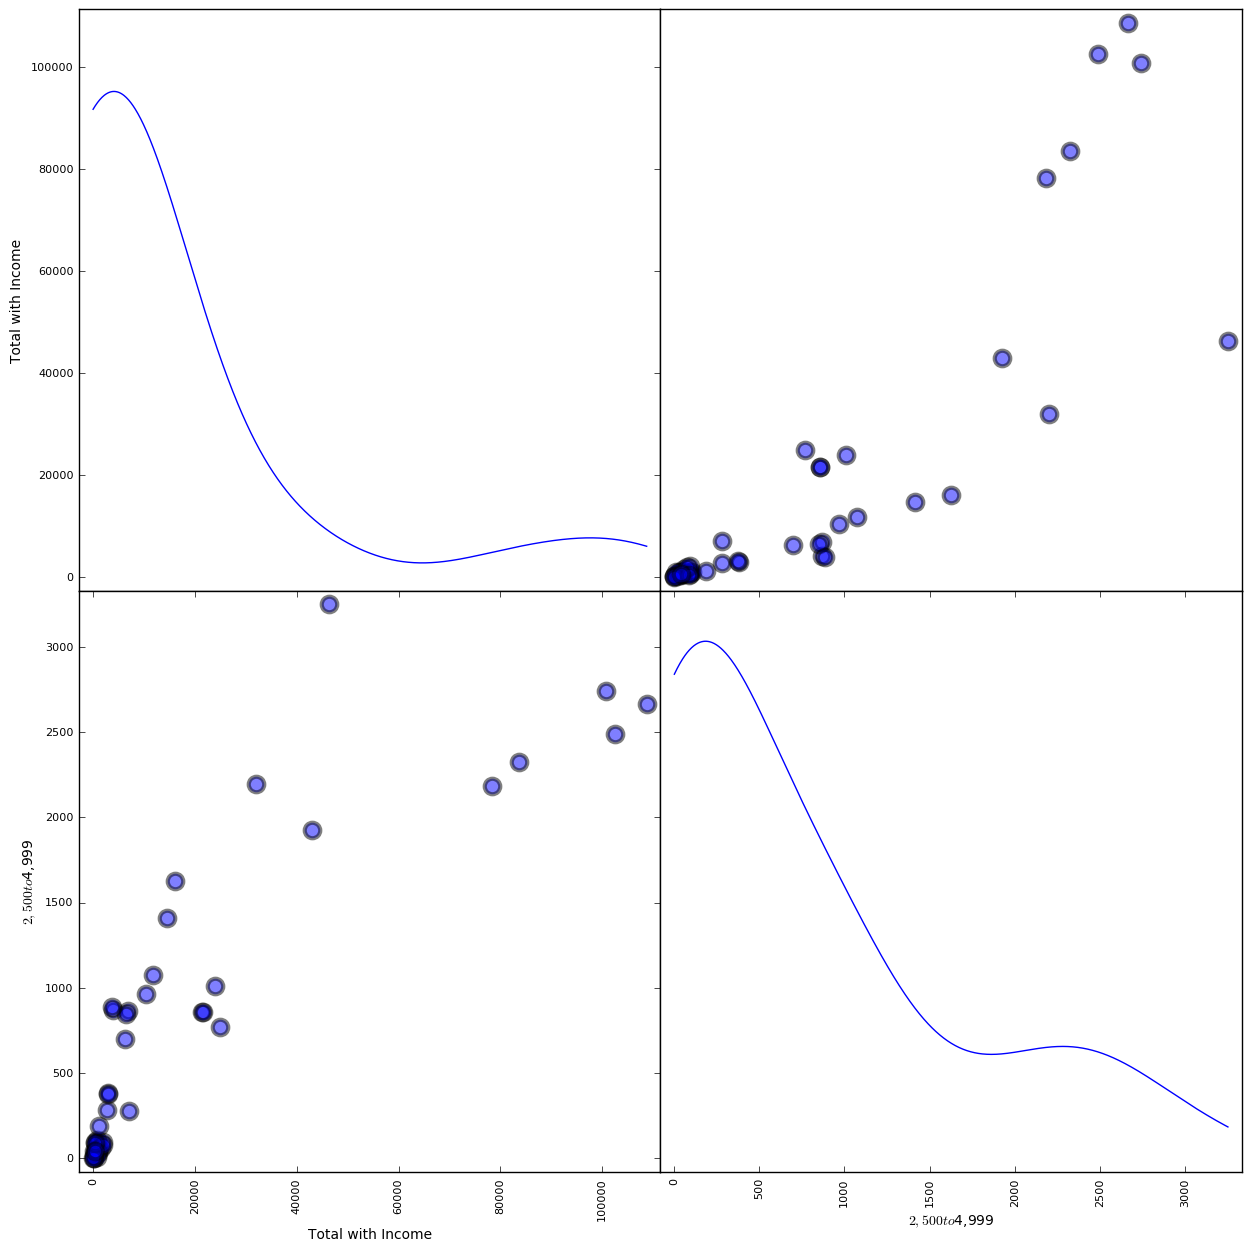

In [8]:
fig = pd.scatter_matrix(allmales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde')                

### Figure 1: Scatter matrix for the number of males with an income of $2500 to 4999.

In [9]:
#the real values in the Median income row are fewer than the number of rows
print (allmales['asian'].shape)
allmales['asian'].applymap(np.isreal).sum()

(49, 49)


Characteristic           1
Total with Income       49
$1 to $2,499 or loss    49
$2,500 to $4,999        49
$5,000 to $7,499        49
$7,500 to $9,999        49
$10,000 to $12,499      49
$12,500 to $14,999      49
$15,000 to $17,499      49
$17,500 to $19,999      49
$20,000 to $22,499      49
$22,500 to $24,999      49
$25,000 to $27,499      49
$27,500 to $29,999      49
$30,000 to $32,499      49
$32,500 to $34,999      49
$35,000 to $37,499      49
$37,500 to $39,999      49
$40,000 to $42,499      49
$42,500 to $44,999      49
$45,000 to $47,499      49
$47,500 to $49,999      49
$50,000 to $52,499      49
$52,500 to $54,999      49
$55,000 to $57,499      49
$57,500 to $59,999      49
$60,000 to $62,499      49
$62,500 to $64,999      49
$65,000 to $67,499      49
$67,500 to $69,999      49
$70,000 to $72,499      49
$72,500 to $74,999      49
$75,000 to $77,499      49
$77,500 to $79,999      49
$80,000 to $82,499      49
$82,500 to $84,999      49
$85,000 to $87,499      49
$

In [10]:
# there are a lot of non-real values that make the analysis hard.
# the ugly loops below will help you clean it up.

for gender in [allmales, allfemales]:
    for k in gender:
        # find non real values in the dataframe with applymap
        isreal  = gender[k].applymap(np.isreal)
        for c in gender[k].columns :
            #i f some but not all values in column are real
            #replace the non real ones
            if isreal.sum()[c] > 0 and \
            isreal.sum()[c] < gender[k].shape[0]:
                gender[k][c][~isreal[c]] =  np.nan
                gender[k][c] = gender[k][c].astype(float)

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# Now you can plot the dataframe values with a scatter plot 

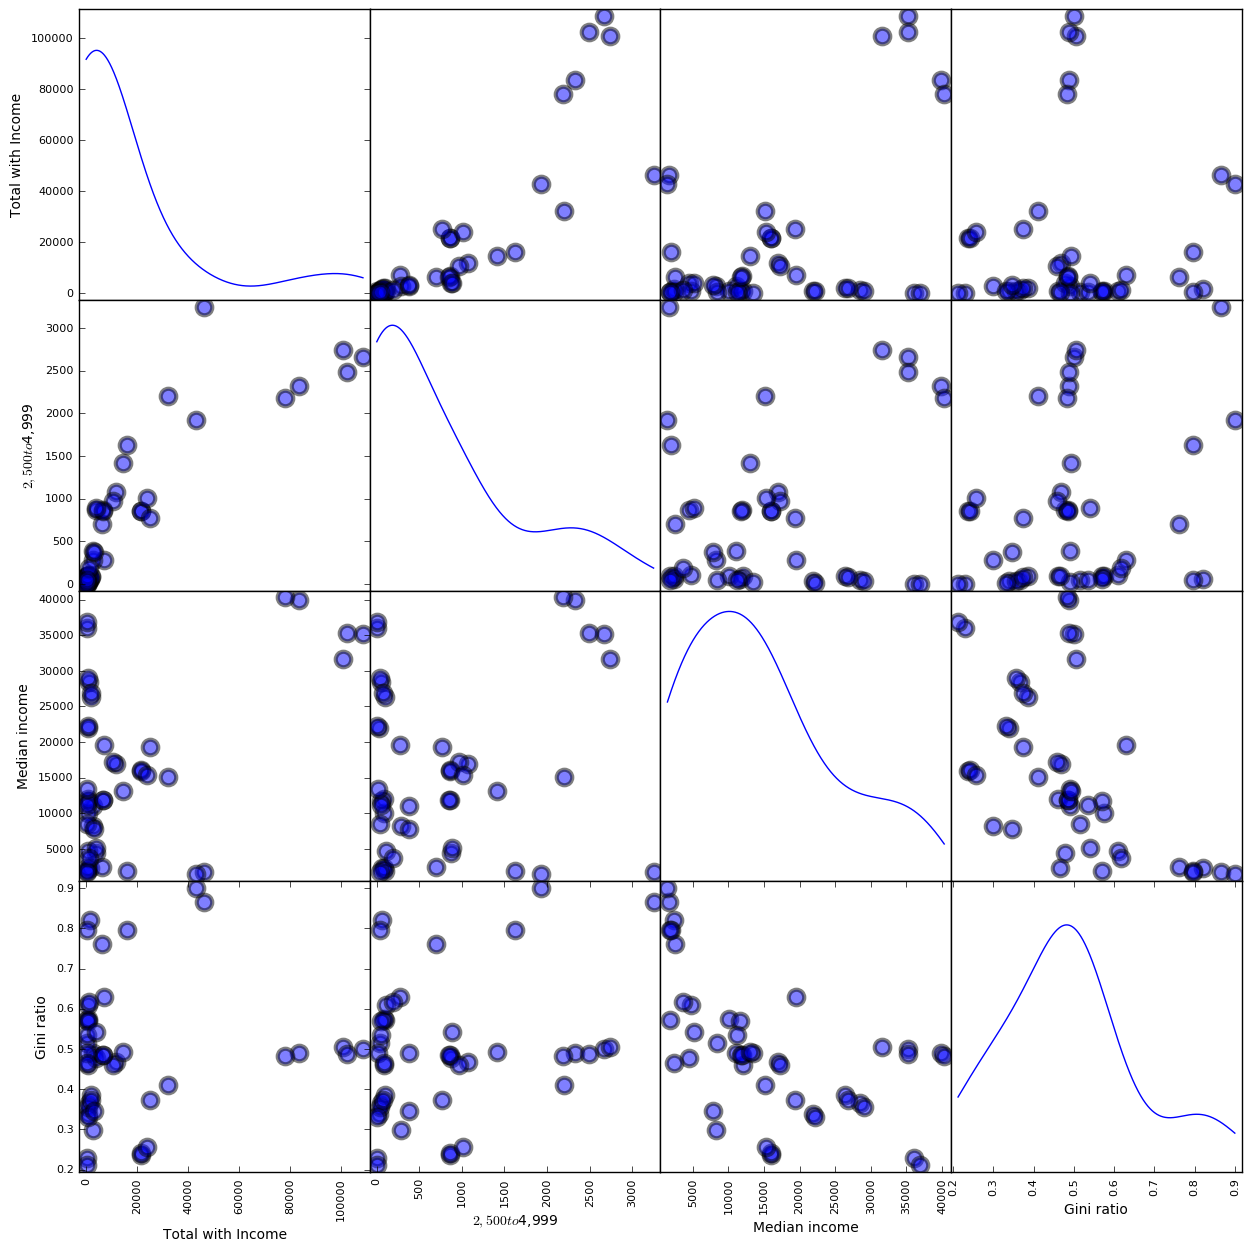

In [11]:
# use scatter_matrix to make this plot... 
fig = pd.scatter_matrix(allmales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde')    

### Figure 2: Scatter matrix depicting the relationships between all of the numerical data present. 

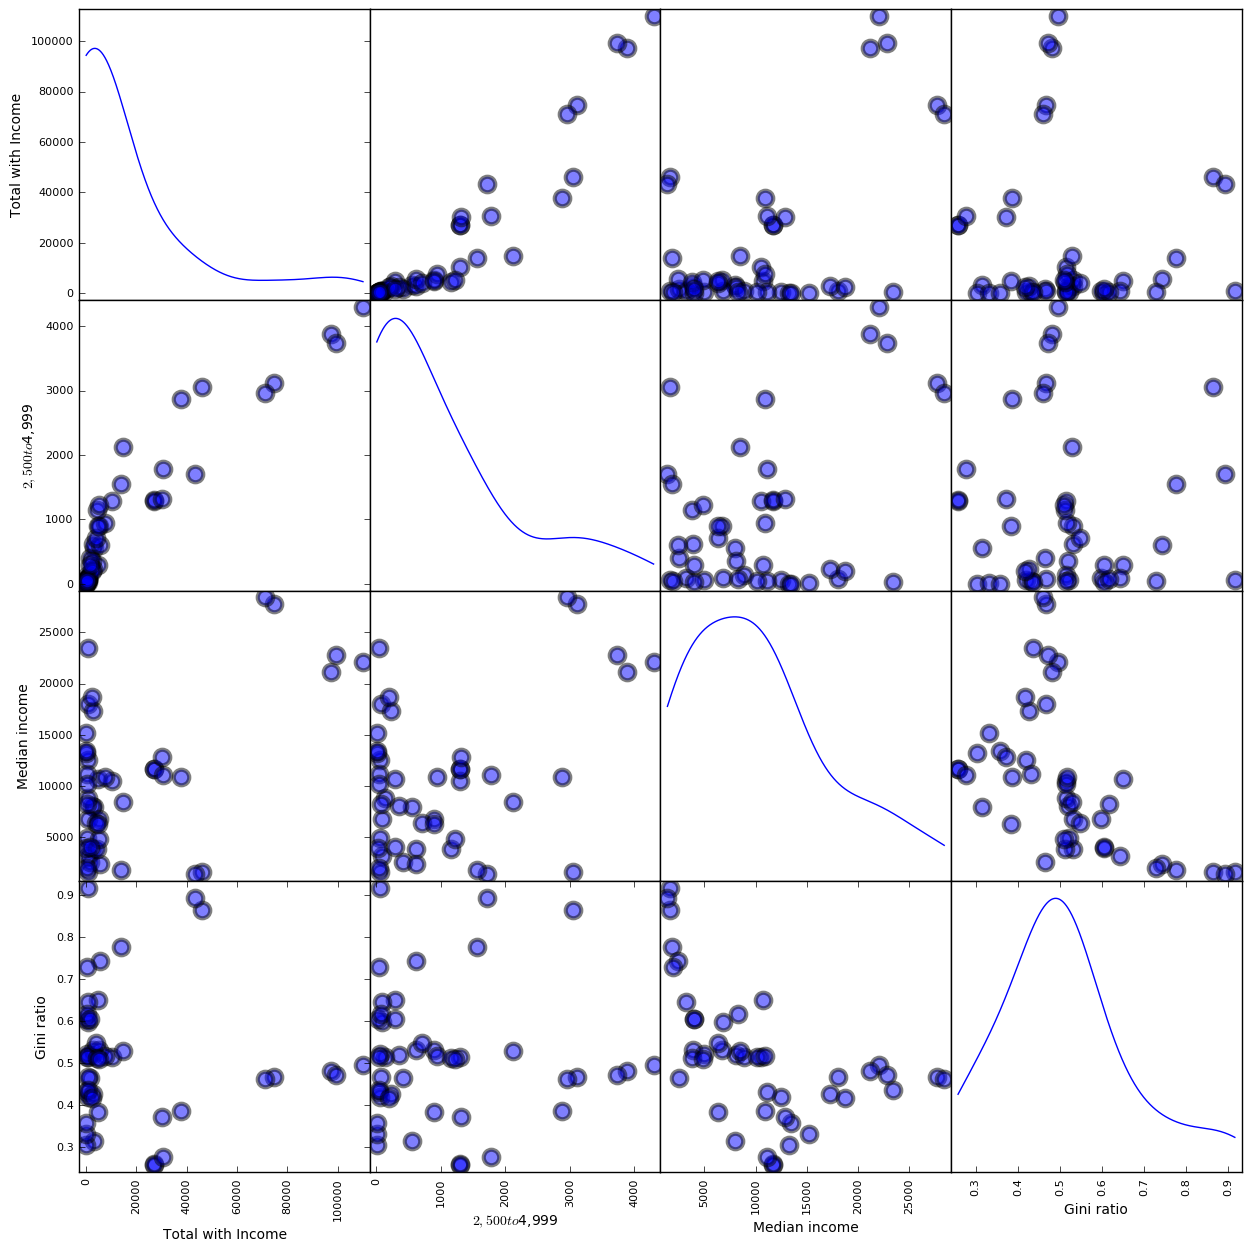

In [12]:
# do the same for all females
fig = pd.scatter_matrix(allfemales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde')

### Figure 3: Scatter matrix of all female income data. 

# 3. See how the male and female income relate to one another 

**To conduct this analysis, I will use the Total Median Income of females vs the Total Median Income of males, race by race.**

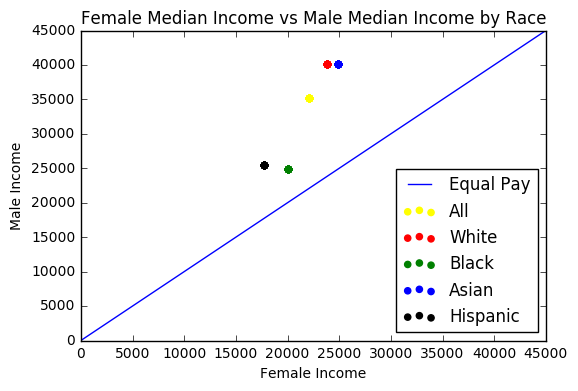

In [13]:
##plotting the Total median income by race
##pl.scatter...

f_median_income = []
m_median_income = []

race = ['all','white','black','asian','hispanic']
color = ['yellow','red','green','blue','black']
label = ['Equal Pay','All','White','Black','Asian','Hispanic']

for i in race:     
    f_median = allfemales[i][u'Median income'][1]
    f_median_income.append(f_median)
    m_median = allmales[i][u'Median income'][1]
    m_median_income.append(m_median)
    
fig = plt.figure()
ax = fig.add_subplot(111)

for i in range (len(f_median_income)):
    for i in range (len(m_median_income)):
        for i in range (len(color)):
                ax.scatter (x = f_median_income[i], y = m_median_income[i], color = color[i], label = label[i])

pl.plot([0,50000],[0,50000], label = 'Equal pay')
pl.xlim(0,45000)
pl.ylim(0,45000)

ax.set_title('Female Median Income vs Male Median Income by Race')
ax.set_xlabel('Female Income')
ax.set_ylabel('Male Income')
ax.legend(label, loc = 'lower right')

### Figure 4: Scatter plot of Female Median Income vs Male Median Income by Race. 

# 4. Now fit the data with a line.

In [14]:
#fit with whichever method you prefer and plot here
df = pd.DataFrame([f_median_income, m_median_income], index = ['f_median_income', 'm_median_income']).T

# OLS Regression
model = smf.ols(formula = 'm_median_income ~ f_median_income', data = df).fit()

# Analytical Regression
cor = stats.spearmanr(df.f_median_income, df.m_median_income)
beta1 = cor[0] * df.m_median_income.std() / df.f_median_income.std()
beta0 = df.m_median_income.mean() - beta1 * df.f_median_income.mean()
beta0, beta1

(-18816.688215839175, 2.3951962049534599)

## Remake the scatter plot, with your line fit as well as the analytical solution to compare that with the result of your numerical one (remember: a line is y = beta0 + beta1 * x)

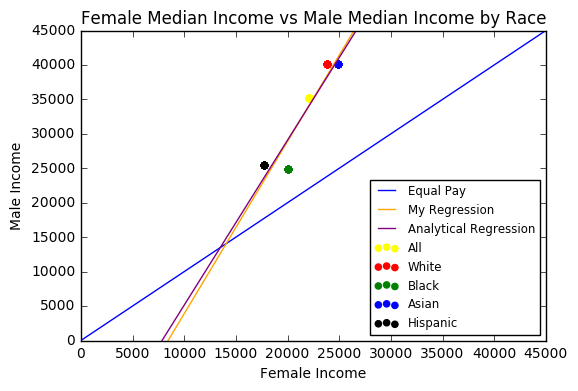

In [15]:
label = ['Equal Pay','My Regression','Analytical Regression','All','White','Black','Asian','Hispanic']

fig = plt.figure()
ax = fig.add_subplot(111)
full_line = np.linspace(0,50000,1000)

pl.plot([0,50000],[0,50000], label = 'Equal pay')
pl.plot(full_line, full_line*model.params[1]+model.params[0], color = 'orange', label = 'My Regression')
pl.plot(full_line, beta1*full_line+beta0, color = 'purple', label = 'Analytical Regression')
pl.xlim(0,45000)
pl.ylim(0,45000)

for i in range (len(f_median_income)):
    for i in range (len(m_median_income)):
        for i in range (len(color)):
                ax.scatter (x = f_median_income[i], y = m_median_income[i], color = color[i], label = label[i])


ax.set_title('Female Median Income vs Male Median Income by Race')
ax.set_xlabel('Female Income')
ax.set_ylabel('Male Income')
ax.legend(label, loc = 'lower right', fontsize = 8.5)

### Figure 5: Scatter plot of Female Median Income vs Male Median Income by Race. The data has been fitted with an OLS and Analytical regression. 

# 5. Include All Income Types into Analysis

In [16]:
all_males_allincomes = np.array(
    np.concatenate([allmales['all']['Median income'][:].values,
                    allmales['white']['Median income'][:].values,
                    allmales['black']['Median income'][:].values,
                    allmales['hispanic']['Median income'][:].values,
                    allmales['asian']['Median income'][:].values]).flatten())
#with a list comprehension syntax, but the result i the same as above
all_females_allincomes = np.array(
    np.concatenate([allfemales[k]['Median income'][:].values \
                    for k in ['all',
                                   'white', 'black', 
                                    'hispanic', 'asian']]).flatten())

#the mask is False where either male or female value is NaN. 
#Notice that True is really just >1, and False really 0. 
#so i can add the male and female mask and the resulting mask will be 
#False where both arrays are not Nan, and true otherwise. 
mask = ~(np.isnan(all_males_allincomes) + np.isnan(all_females_allincomes))

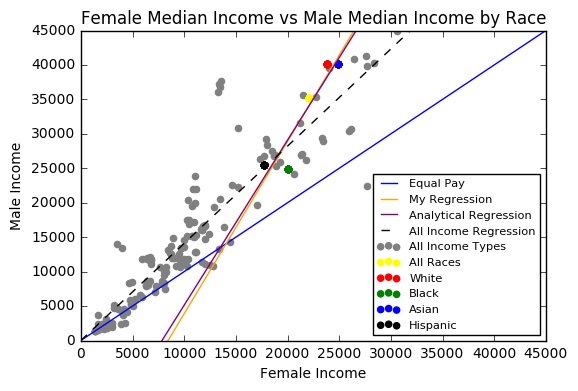

In [17]:
# Storing allincomes in a dataframe and fitting it with OLS. 
df2 = pd.DataFrame([all_females_allincomes, all_males_allincomes], index = ['f_median_income', 'm_median_income']).T
model2 = smf.ols(formula = 'all_males_allincomes ~ all_females_allincomes', data = df2).fit()

# Analytical Regression for allincomes
cor2 = stats.spearmanr(all_males_allincomes[mask], all_females_allincomes[mask])
beta3 = cor2[0] * all_females_allincomes[mask].std() / all_males_allincomes[mask].std()
beta2 = all_females_allincomes[mask].mean() - beta3 * all_males_allincomes[mask].mean()


label = ['Equal Pay','My Regression','Analytical Regression','All Income Regression',
         'All Income Types','All Races','White','Black','Asian','Hispanic']

fig = plt.figure()
ax = fig.add_subplot(111)
full_line = np.linspace(0,50000,1000)

pl.plot([0,50000],[0,50000], label = 'Equal pay')
pl.plot(full_line, full_line*model.params[1]+model.params[0], color = 'orange', label = 'My Regression')
pl.plot(full_line, beta1*full_line+beta0, color = 'purple', label = 'Analytical Regression')
pl.plot(full_line,full_line*model2.params[1]+model2.params[0], color = 'black', linestyle = 'dashed', label = 'All Income Regression')
pl.scatter(all_females_allincomes, all_males_allincomes, color = 'grey', label = 'All Income Types')
pl.xlim(0,45000)
pl.ylim(0,45000)


for i in range (len(f_median_income)):
    for i in range (len(m_median_income)):
        for i in range (len(color)):
                ax.scatter (x = f_median_income[i], y = m_median_income[i], color = color[i], label = label[i])


ax.set_title('Female Median Income vs Male Median Income by Race')
ax.set_xlabel('Female Income')
ax.set_ylabel('Male Income')
ax.legend(label, loc = 'lower right', fontsize = 8.2)

### Figure 6: Scatter plot of Female Median Income vs Male Median Income by Race. The data has been fitted with an OLS and Analytical regression. The All Income Regression illustrates the trend when accounting for all income types for all races. 

# 6. PREDICTION

### Pick a stipend and predict what a woman would make in relation to a man. 

In [18]:
stipend = 85000
female_stipend = (beta2 + beta3 * stipend)
print ('For a job position paying a male $85,000, a woman would earn roughly $',round(female_stipend) ,'.')

For a job position paying a male $85,000, a woman would earn roughly $ 54193.0 .


# 7. Do you have any comments about what these data tell us about race? 
How you would go about analyzing race differences with these data? (just a few sentences)

I would analyze the differences between median incomes for women across races and men across races. It is apparent that men outearn women regardless of race, however I would like to know if the trends hold up within genders. 